In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from time import time
import scipy.cluster.hierarchy as sch

In [2]:
hla = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\hla_types.csv")

In [3]:
tcell = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\t_cell_responses.csv")

In [4]:
hla.head()

,SUBJID,Gene,Allele1,Allele2
0,Patient 1,HLA-A,A*01:01:01,A*26:01:01
1,Patient 1,HLA-B,B*08:01:01,B*49:01:01
2,Patient 1,HLA-C,C*07:01:01,C*07:01:01
3,Patient 1,HLA-DPA1,DPA1*01:03:01,DPA1*01:03:01
4,Patient 1,HLA-DPB1,DPB1*04:01:01,DPB1*03:01:01


In [5]:
tcell.head()

,Patient ID,Hugo Symbol,Protein Change,Included as,Neoantiogen sequence,WT sequence,Neoantigen minimal epitopes,Pool,Neoantigen ID
0,1,PAX7,p.D347Y,"i,ii",HQGGLAAAAAAAYTSSAYGARHSFS,HQGGLAAAAAAADTSSAYGARHSFS,LAAAAAAAY,Pool 1-7,1
1,1,KDM6A,p.T1131I,"i,ii",LSHVGHTILGMNIVQLYMKVPGSRT,LSHVGHTILGMNTVQLYMKVPGSRT,HTILGMNIV,Pool 1-7,2
2,1,UBR4,p.R142L,"i,ii",ILLIKGLCTGCSLLDRTEIITFTAM,ILLIKGLCTGCSRLDRTEIITFTAM,SLLDRTEI,Pool 1-7,3
3,1,NF1,p.E1220K,"i,ii",LVELVTMMGDQGKLPIAMALANVVP,LVELVTMMGDQGELPIAMALANVVP,GKLPIAMAL,Pool 1-7,4
4,1,SEC24C,p.L190R,"i,ii",LYGSYPQGQAPPRSQAQGHPGIQTP,LYGSYPQGQAPPLSQAQGHPGIQTP,RSQAQGHPGI,Pool 1-7,5


In [6]:
hla.shape
hla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SUBJID   176 non-null    object
 1   Gene     176 non-null    object
 2   Allele1  176 non-null    object
 3   Allele2  176 non-null    object
dtypes: object(4)
memory usage: 5.6+ KB


In [7]:
hla.isnull().sum()

SUBJID     0
Gene       0
Allele1    0
Allele2    0
dtype: int64

In [8]:
hla.describe()

,SUBJID,Gene,Allele1,Allele2
count,176,176,176,176
unique,16,11,62,65
top,Patient 1,HLA-A,nocall,nocall
freq,11,16,36,36


In [9]:
tcell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Patient ID                   360 non-null    int64 
 1   Hugo Symbol                  360 non-null    object
 2   Protein Change               360 non-null    object
 3   Included as                  360 non-null    object
 4   Neoantiogen sequence         360 non-null    object
 5   WT sequence                  353 non-null    object
 6   Neoantigen minimal epitopes  360 non-null    object
 7   Pool                         360 non-null    object
 8   Neoantigen ID                360 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 25.4+ KB


In [10]:
tcell.fillna("NA", inplace=True)
print(tcell.isnull().sum())

Patient ID                     0
Hugo Symbol                    0
Protein Change                 0
Included as                    0
Neoantiogen sequence           0
WT sequence                    0
Neoantigen minimal epitopes    0
Pool                           0
Neoantigen ID                  0
dtype: int64


In [11]:
# Find all unique members of the Patient ID column of the tcell dataframe
unique_patient_ids = tcell['Patient ID'].unique()

# Display the unique values
print(unique_patient_ids)

[ 1  2  4  5  6  7  8  9 10 13 14]


In [12]:
# Find all unique members of the Subject ID column of hla dataframe
unique_subject_ids = hla['SUBJID'].unique()

# Display the unique values
print(unique_subject_ids)

['Patient 1' 'Patient 10' 'Patient 11' 'Patient 12' 'Patient 13'
 'Patient 14' 'Patient 15' 'Patient 16' 'Patient 2' 'Patient 3'
 'Patient 4' 'Patient 5' 'Patient 6' 'Patient 7' 'Patient 8' 'Patient 9']


In [13]:
# Standardizing column names for clarity
tcell.rename(columns={'Patient ID': 'SUBJID'}, inplace=True)

In [14]:
tcell['SUBJID'] = tcell['SUBJID'].astype(str).str.strip()
hla['SUBJID'] = hla['SUBJID'].str.replace("Patient ", "").astype(str).str.strip()

In [15]:
merged_data = pd.merge(tcell, hla, on='SUBJID', how = 'inner')

merged_data.head()

,SUBJID,Hugo Symbol,Protein Change,Included as,Neoantiogen sequence,WT sequence,Neoantigen minimal epitopes,Pool,Neoantigen ID,Gene,Allele1,Allele2
0,1,PAX7,p.D347Y,"i,ii",HQGGLAAAAAAAYTSSAYGARHSFS,HQGGLAAAAAAADTSSAYGARHSFS,LAAAAAAAY,Pool 1-7,1,HLA-A,A*01:01:01,A*26:01:01
1,1,PAX7,p.D347Y,"i,ii",HQGGLAAAAAAAYTSSAYGARHSFS,HQGGLAAAAAAADTSSAYGARHSFS,LAAAAAAAY,Pool 1-7,1,HLA-B,B*08:01:01,B*49:01:01
2,1,PAX7,p.D347Y,"i,ii",HQGGLAAAAAAAYTSSAYGARHSFS,HQGGLAAAAAAADTSSAYGARHSFS,LAAAAAAAY,Pool 1-7,1,HLA-C,C*07:01:01,C*07:01:01
3,1,PAX7,p.D347Y,"i,ii",HQGGLAAAAAAAYTSSAYGARHSFS,HQGGLAAAAAAADTSSAYGARHSFS,LAAAAAAAY,Pool 1-7,1,HLA-DPA1,DPA1*01:03:01,DPA1*01:03:01
4,1,PAX7,p.D347Y,"i,ii",HQGGLAAAAAAAYTSSAYGARHSFS,HQGGLAAAAAAADTSSAYGARHSFS,LAAAAAAAY,Pool 1-7,1,HLA-DPB1,DPB1*04:01:01,DPB1*03:01:01


In [16]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3960 entries, 0 to 3959
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SUBJID                       3960 non-null   object
 1   Hugo Symbol                  3960 non-null   object
 2   Protein Change               3960 non-null   object
 3   Included as                  3960 non-null   object
 4   Neoantiogen sequence         3960 non-null   object
 5   WT sequence                  3960 non-null   object
 6   Neoantigen minimal epitopes  3960 non-null   object
 7   Pool                         3960 non-null   object
 8   Neoantigen ID                3960 non-null   int64 
 9   Gene                         3960 non-null   object
 10  Allele1                      3960 non-null   object
 11  Allele2                      3960 non-null   object
dtypes: int64(1), object(11)
memory usage: 402.2+ KB


In [17]:
uniqueIDs = merged_data['SUBJID'].unique()
print(uniqueIDs)

['1' '2' '4' '5' '6' '7' '8' '9' '10' '13' '14']


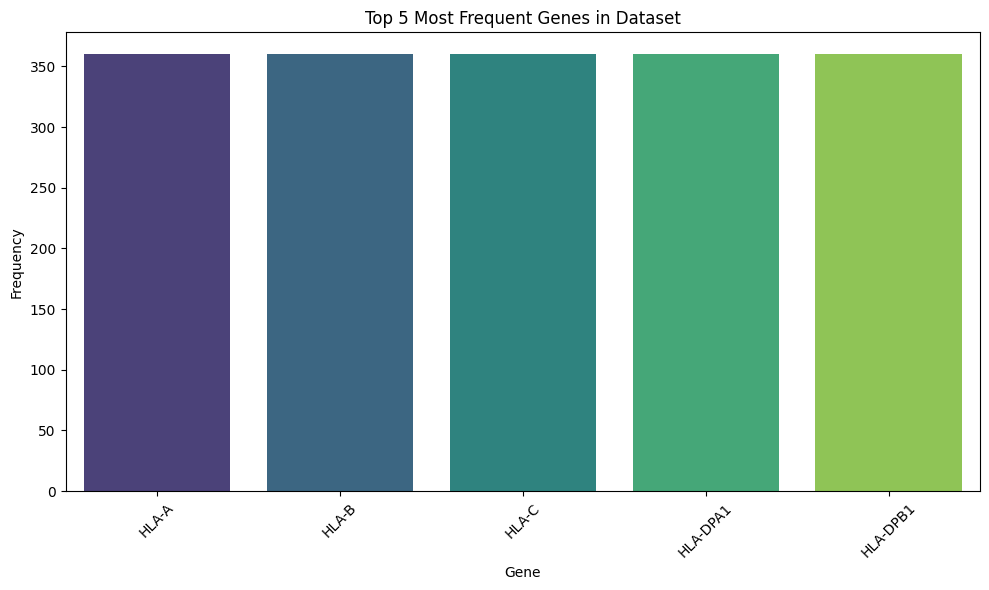

In [18]:
# Distribution of unique genes
gene_counts = merged_data['Gene'].value_counts()
# Plot distribution of genes
plt.figure(figsize=(10, 6))
sns.barplot(x=gene_counts[:5].index, y=gene_counts[:5].values, palette="viridis")
plt.title("Top 5 Most Frequent Genes in Dataset")
plt.xlabel("Gene")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

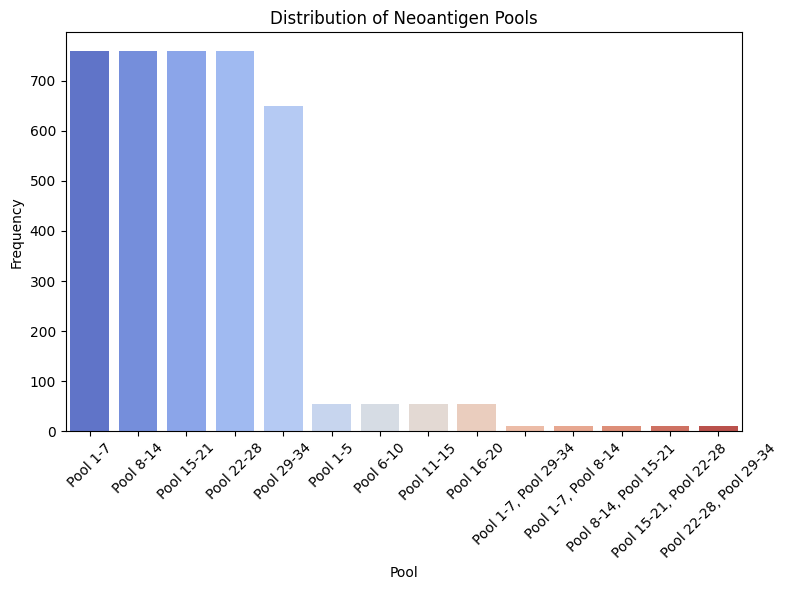

In [19]:
# Distribution of neoantigen pools
pool_counts = merged_data['Pool'].value_counts()
# Plot distribution of pools
plt.figure(figsize=(8, 6))
sns.barplot(x=pool_counts.index, y=pool_counts.values, palette="coolwarm")
plt.title("Distribution of Neoantigen Pools")
plt.xlabel("Pool")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

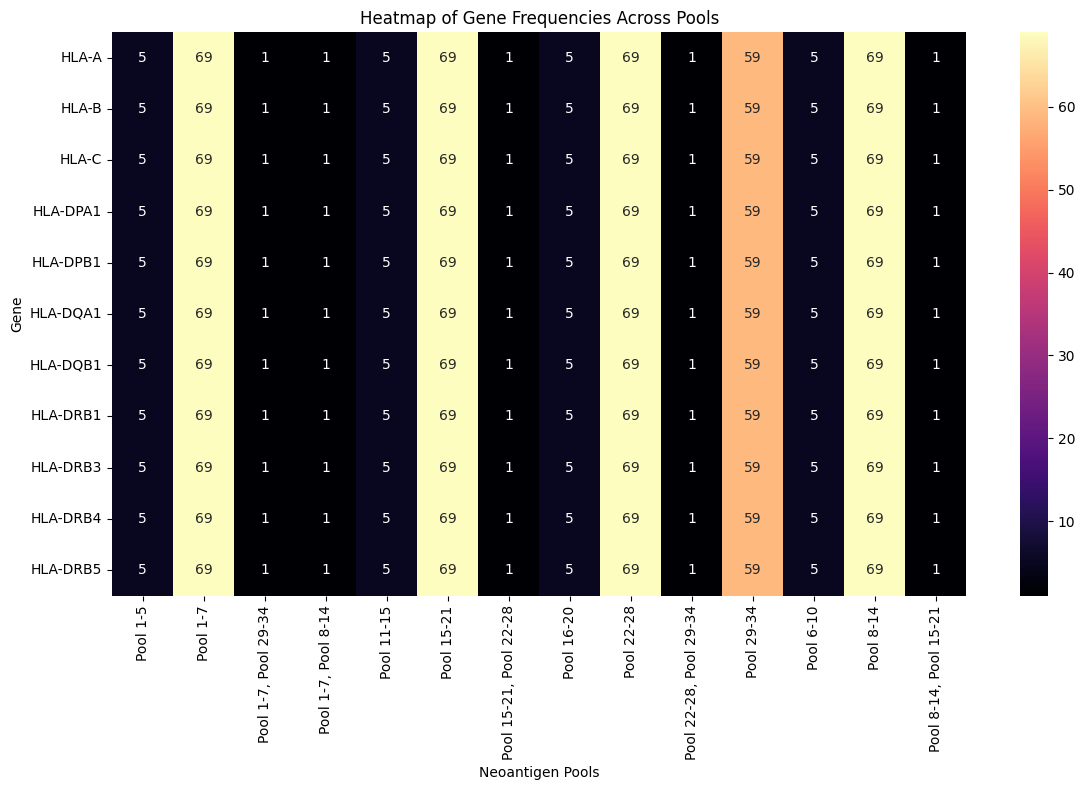

In [20]:
# Relationship between Genes and Pools
plt.figure(figsize=(12, 8))
gene_pool_pivot = merged_data.pivot_table(index='Gene', columns='Pool', aggfunc='size', fill_value=0)
sns.heatmap(gene_pool_pivot, cmap='magma', annot=True, cbar=True)
plt.title("Heatmap of Gene Frequencies Across Pools")
plt.xlabel("Neoantigen Pools")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()

In [21]:
# Distribution of HLA Alleles (Allele1 and Allele2)
allele1_counts = merged_data['Allele1'].value_counts()
allele2_counts = merged_data['Allele2'].value_counts()

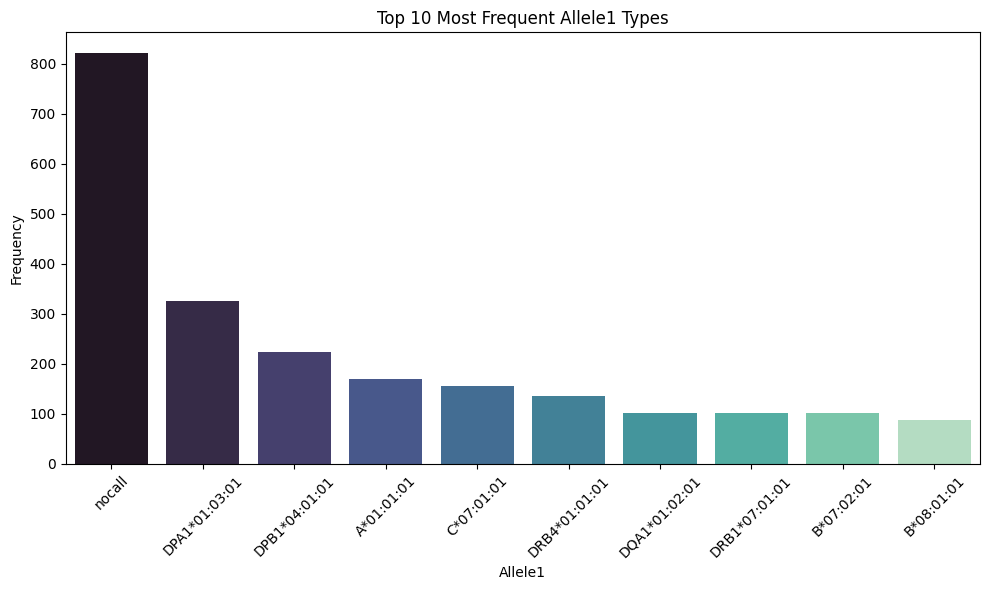

In [22]:
# Top 10 Alleles for Allele1
plt.figure(figsize=(10, 6))
sns.barplot(x=allele1_counts[:10].index, y=allele1_counts[:10].values, palette="mako")
plt.title("Top 10 Most Frequent Allele1 Types")
plt.xlabel("Allele1")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

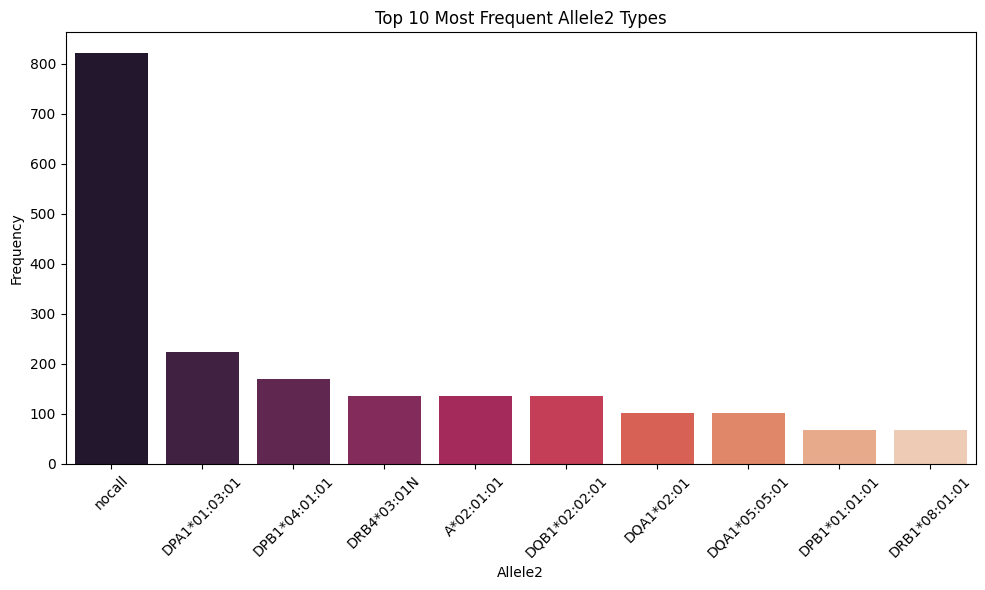

In [23]:
# Top 10 Alleles for Allele2
plt.figure(figsize=(10, 6))
sns.barplot(x=allele2_counts[:10].index, y=allele2_counts[:10].values, palette="rocket")
plt.title("Top 10 Most Frequent Allele2 Types")
plt.xlabel("Allele2")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

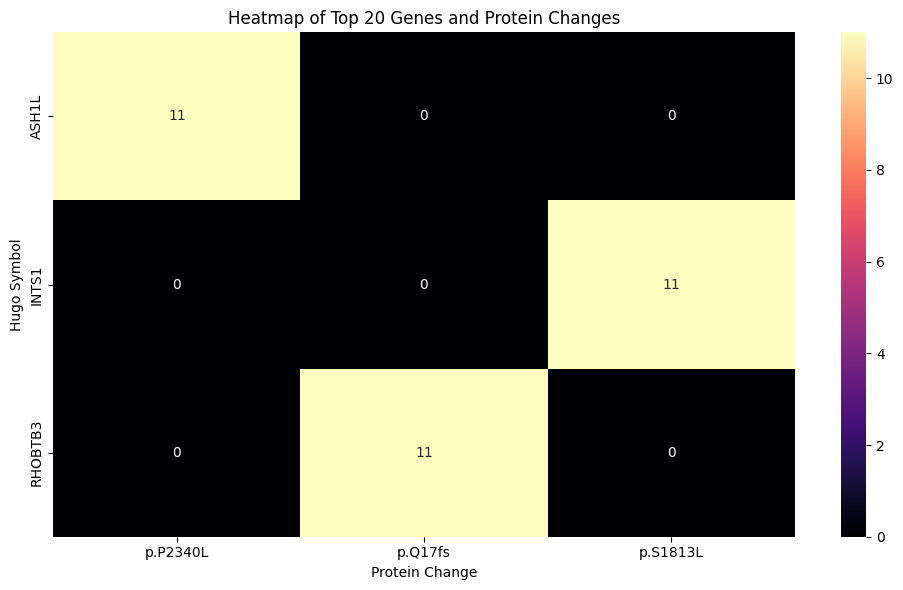

In [24]:
# Top 20 most frequent Hugo Symbols and Protein Changes
top_hugo_symbols = merged_data['Hugo Symbol'].value_counts().head(20).index
top_protein_changes = merged_data['Protein Change'].value_counts().head(20).index


filtered_data = merged_data[
    (merged_data['Hugo Symbol'].isin(top_hugo_symbols)) & 
    (merged_data['Protein Change'].isin(top_protein_changes))
]


gene_pool_pivot = filtered_data.pivot_table(index='Hugo Symbol', columns='Protein Change', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(gene_pool_pivot, cmap='magma', annot=True, cbar=True)
plt.title("Heatmap of Top 20 Genes and Protein Changes")
plt.xlabel("Protein Change")
plt.ylabel("Hugo Symbol")
plt.tight_layout()
plt.show()

In [26]:
# Categorical columns to encode
categorical_cols = ['Hugo Symbol', 'Protein Change', 'Gene', 'Allele1', 'Allele2']

encoder = OneHotEncoder(sparse=False)

# One-hot encode categorical features
encoded_data = encoder.fit_transform(merged_data[categorical_cols])

# Standardize the encoded data
scaler = StandardScaler()
scaled_encoded_data = scaler.fit_transform(encoded_data)

# Define features as the standardized encoded data
features = scaled_encoded_data

# Perform PCA on the encoded and standardized data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_encoded_data)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])

C:\Users\dell\anaconda3\envs\rstudio\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  # Remove the CWD from sys.path while we load stuff.


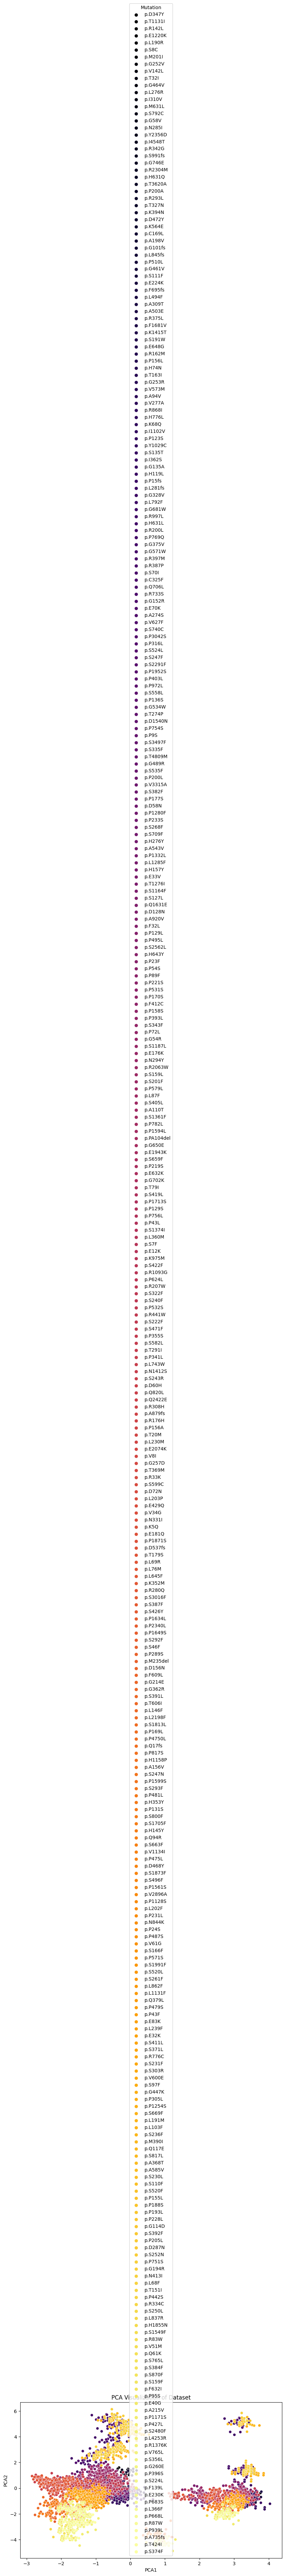

In [27]:
# Add the 'Protein Change' column to the PCA DataFrame
pca_df['Protein Change'] = merged_data['Protein Change']
# Visualize the clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2',hue=merged_data['Protein Change'], palette='inferno', data=pca_df)
plt.title('PCA Visualization of Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Mutation', loc='best')
plt.tight_layout()
plt.show()

C:\Users\dell\anaconda3\envs\rstudio\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  # Remove the CWD from sys.path while we load stuff.


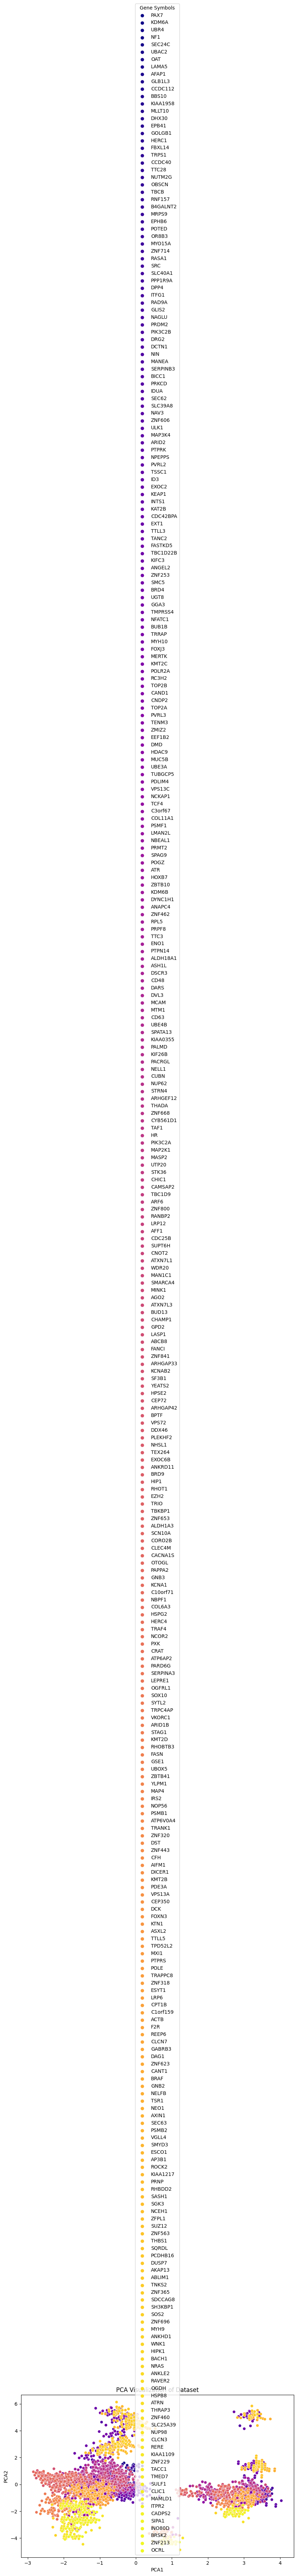

In [28]:
# Add the 'Protein Change' column to the PCA DataFrame
pca_df['Hugo Symbol'] = merged_data['Hugo Symbol']
# Visualize the clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2',hue=merged_data['Hugo Symbol'], palette='plasma', data=pca_df)
plt.title('PCA Visualization of Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Gene Symbols', loc='best')
plt.tight_layout()
plt.show()

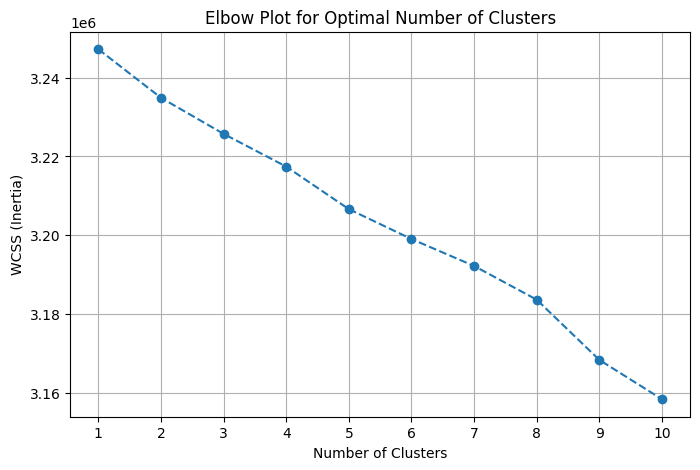

In [29]:
# Calculate WCSS for a range of cluster numbers
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to visualize the elbow point
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [30]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)
merged_data['PCA1'] = pca_components[:, 0]
merged_data['PCA2'] = pca_components[:, 1]



kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(features)

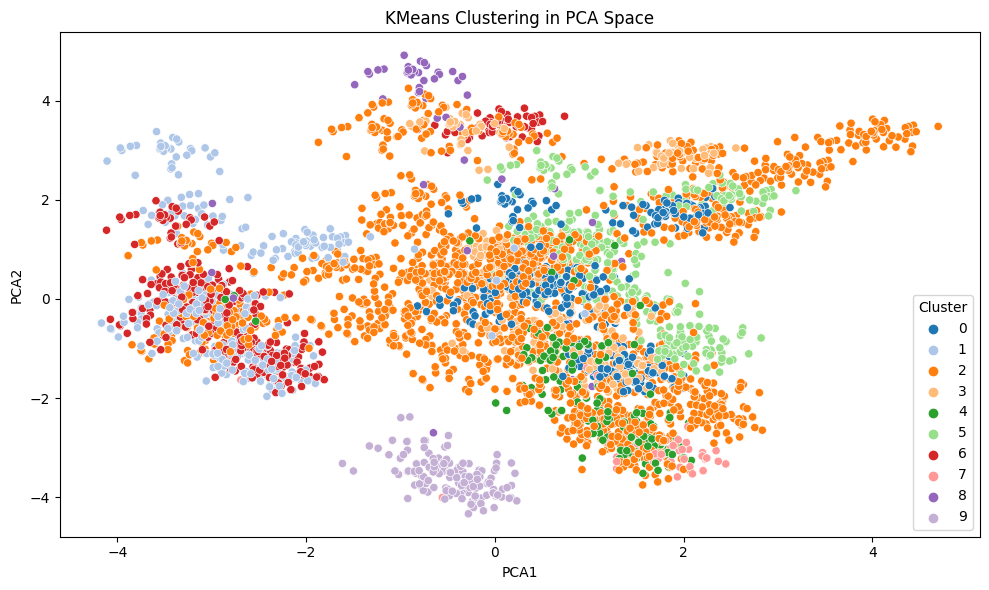

In [31]:
# Visualize the clusters in PCA space (using PCA1 and PCA2 from merged_data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=merged_data['Cluster'], palette='tab20', data=merged_data)
plt.title('KMeans Clustering in PCA Space')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()

Computing t-SNE embedding


C:\Users\dell\anaconda3\envs\rstudio\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


t-SNE completed in 29.37445306777954 seconds.


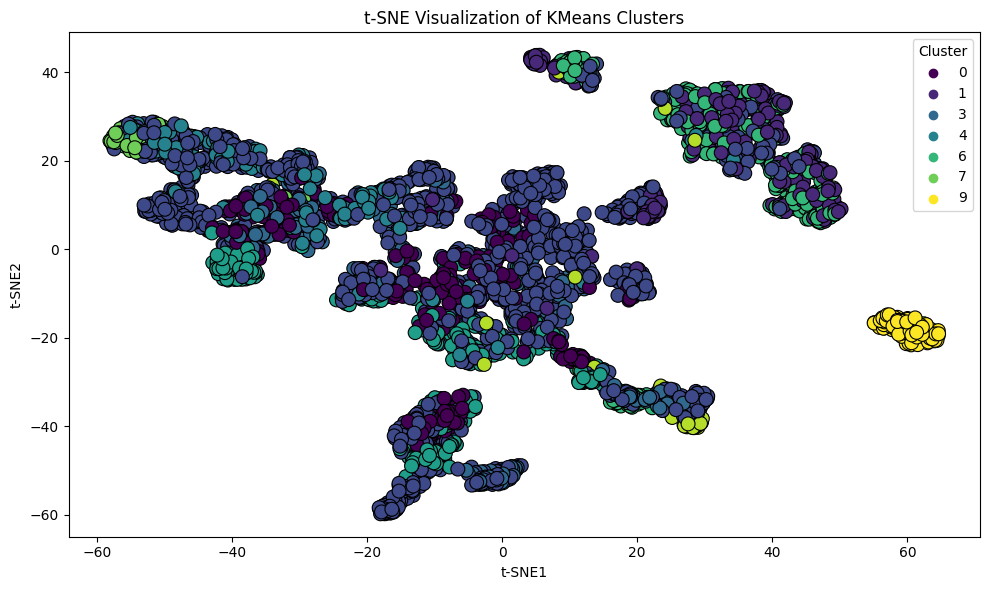

In [32]:
X = merged_data[['PCA1', 'PCA2']]

print("Computing t-SNE embedding")
tsne = TSNE(n_components=2, perplexity=60, learning_rate=200, random_state=42)
t0 = time()
X_tsne = tsne.fit_transform(X)
t1 = time()

print(f"t-SNE completed in {t1 - t0} seconds.")

# Add t-SNE results to merged_data for visualization
merged_data['tSNE1'] = X_tsne[:, 0]
merged_data['tSNE2'] = X_tsne[:, 1]


plt.figure(figsize=(10, 6))
sns.scatterplot(x='tSNE1', y='tSNE2', hue=merged_data['Cluster'], palette='viridis', s=100, edgecolor='k', data=merged_data)
plt.title('t-SNE Visualization of KMeans Clusters')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()

In [33]:
!pip install gseapy

   ---------------------------------------- 390.4/390.4 kB 8.1 MB/s eta 0:00:00


In [34]:
from gseapy import enrichr
# Extract genes from a specific cluster
cluster_genes = merged_data[merged_data['Cluster'] == 2]['Gene'].unique()

# Perform KEGG pathway enrichment
enr = enrichr(
    gene_list=list(cluster_genes), 
    gene_sets='KEGG_2021_Human', 
    organism='Human'
)

# Display top pathways
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Allograft rejection,7/38,4.969763e-20,1.353612e-18,0,0,139734.0,6.210943e+06,HLA-DRB4;HLA-B;HLA-C;HLA-A;HLA-DQA1;HLA-DRB1;H...
1,KEGG_2021_Human,Graft-versus-host disease,7/42,1.062420e-19,1.353612e-18,0,0,139706.0,6.103555e+06,HLA-DRB4;HLA-B;HLA-C;HLA-A;HLA-DQA1;HLA-DRB1;H...
2,KEGG_2021_Human,Type I diabetes mellitus,7/43,1.269012e-19,1.353612e-18,0,0,139699.0,6.078426e+06,HLA-DRB4;HLA-B;HLA-C;HLA-A;HLA-DQA1;HLA-DRB1;H...
3,KEGG_2021_Human,Autoimmune thyroid disease,7/53,6.070666e-19,4.856532e-18,0,0,139629.0,5.856829e+06,HLA-DRB4;HLA-B;HLA-C;HLA-A;HLA-DQA1;HLA-DRB1;H...
4,KEGG_2021_Human,Viral myocarditis,7/60,1.521066e-18,9.734823e-18,0,0,139580.0,5.726565e+06,HLA-DRB4;HLA-B;HLA-C;HLA-A;HLA-DQA1;HLA-DRB1;H...


In [36]:
# Extract genes from a specific cluster
cluster_genes = merged_data[merged_data['Cluster'] == 2]['Hugo Symbol'].unique()

# Perform KEGG pathway enrichment
enr = enrichr(
    gene_list=list(cluster_genes), 
    gene_sets='KEGG_2021_Human', 
    organism='Human'
)

# Display top pathways
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Hepatocellular carcinoma,12/168,0.000033,0.005574,0,0,4.559972,47.111174,MAP2K1;NRAS;AXIN1;KEAP1;DVL3;BRAF;ARID2;ARID1B...
1,KEGG_2021_Human,Proteoglycans in cancer,13/205,0.000053,0.005574,0,0,4.018531,39.525935,CD63;MAP2K1;ARHGEF12;HPSE2;ROCK2;SRC;ITPR2;BRA...
2,KEGG_2021_Human,Lysine degradation,7/63,0.000096,0.005574,0,0,7.336452,67.868315,KMT2D;KMT2C;KMT2B;PRDM2;ASH1L;SMYD3;EZH2
3,KEGG_2021_Human,Regulation of actin cytoskeleton,13/218,0.000100,0.005574,0,0,3.761184,34.642625,NCKAP1;MAP2K1;ARHGEF12;ROCK2;SRC;F2R;BRAF;ACTB...
4,KEGG_2021_Human,GnRH signaling pathway,8/93,0.000190,0.008487,0,0,5.532309,47.395235,MAP2K1;NRAS;SRC;PRKCD;ITPR2;CACNA1S;SOS2;MAP3K4


In [37]:
# Extract genes from a specific cluster
cluster_genes = merged_data[merged_data['Cluster'] == 6]['Gene'].unique()

# Perform KEGG pathway enrichment
enr = enrichr(
    gene_list=list(cluster_genes), 
    gene_sets='KEGG_2021_Human', 
    organism='Human'
)

# Display top pathways
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Asthma,2/31,0.000002,0.000027,0,0,39938.0,518068.577267,HLA-DRB4;HLA-DRB3
1,KEGG_2021_Human,Allograft rejection,2/38,0.000004,0.000027,0,0,39924.0,501385.403722,HLA-DRB4;HLA-DRB3
2,KEGG_2021_Human,Graft-versus-host disease,2/42,0.000004,0.000027,0,0,39916.0,493192.365066,HLA-DRB4;HLA-DRB3
3,KEGG_2021_Human,Type I diabetes mellitus,2/43,0.000005,0.000027,0,0,39914.0,491266.605251,HLA-DRB4;HLA-DRB3
4,KEGG_2021_Human,Intestinal immune network for IgA production,2/48,0.000006,0.000027,0,0,39904.0,482265.623536,HLA-DRB4;HLA-DRB3


In [38]:
# Extract genes from a specific cluster
cluster_genes = merged_data[merged_data['Cluster'] == 6]['Hugo Symbol'].unique()

# Perform KEGG pathway enrichment
enr = enrichr(
    gene_list=list(cluster_genes), 
    gene_sets='KEGG_2021_Human', 
    organism='Human'
)

# Display top pathways
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Hepatocellular carcinoma,12/168,0.000033,0.005574,0,0,4.559972,47.111174,MAP2K1;NRAS;AXIN1;KEAP1;DVL3;BRAF;ARID2;ARID1B...
1,KEGG_2021_Human,Proteoglycans in cancer,13/205,0.000053,0.005574,0,0,4.018531,39.525935,CD63;MAP2K1;ARHGEF12;HPSE2;ROCK2;SRC;ITPR2;BRA...
2,KEGG_2021_Human,Lysine degradation,7/63,0.000096,0.005574,0,0,7.336452,67.868315,KMT2D;KMT2C;KMT2B;PRDM2;ASH1L;SMYD3;EZH2
3,KEGG_2021_Human,Regulation of actin cytoskeleton,13/218,0.000100,0.005574,0,0,3.761184,34.642625,NCKAP1;MAP2K1;ARHGEF12;ROCK2;SRC;F2R;BRAF;ACTB...
4,KEGG_2021_Human,GnRH signaling pathway,8/93,0.000190,0.008487,0,0,5.532309,47.395235,MAP2K1;NRAS;SRC;PRKCD;ITPR2;CACNA1S;SOS2;MAP3K4


In [39]:
# Extract genes from a specific cluster
cluster_genes = merged_data[merged_data['Cluster'] == 9]['Gene'].unique()

# Perform KEGG pathway enrichment
enr = enrichr(
    gene_list=list(cluster_genes), 
    gene_sets='KEGG_2021_Human', 
    organism='Human'
)

# Display top pathways
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Asthma,1/31,0.00155,0.0084,0,0,19969.0,129189.850988,HLA-DRB4
1,KEGG_2021_Human,Allograft rejection,1/38,0.00190,0.0084,0,0,19962.0,125080.297320,HLA-DRB4
2,KEGG_2021_Human,Graft-versus-host disease,1/42,0.00210,0.0084,0,0,19958.0,123057.756134,HLA-DRB4
3,KEGG_2021_Human,Type I diabetes mellitus,1/43,0.00215,0.0084,0,0,19957.0,122581.989405,HLA-DRB4
4,KEGG_2021_Human,Intestinal immune network for IgA production,1/48,0.00240,0.0084,0,0,19952.0,120356.527275,HLA-DRB4


In [40]:
# Extract genes from a specific cluster
cluster_genes = merged_data[merged_data['Cluster'] == 9]['Hugo Symbol'].unique()

# Perform KEGG pathway enrichment
enr = enrichr(
    gene_list=list(cluster_genes), 
    gene_sets='KEGG_2021_Human', 
    organism='Human'
)

# Display top pathways
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Lysine degradation,3/63,0.008191,0.618722,0,0,7.737891,37.177955,KMT2C;ASH1L;EZH2
1,KEGG_2021_Human,Vascular smooth muscle contraction,4/133,0.011440,0.618722,0,0,4.819630,21.546931,MAP2K1;ARHGEF12;CACNA1S;MYH10
2,KEGG_2021_Human,Regulation of actin cytoskeleton,5/218,0.014461,0.618722,0,0,3.661972,15.513282,NCKAP1;MAP2K1;ARHGEF12;SPATA13;MYH10
3,KEGG_2021_Human,Salmonella infection,5/249,0.024136,0.618722,0,0,3.191680,11.886014,DYNC1H1;NCKAP1;MAP2K1;PIK3C2A;ARF6
4,KEGG_2021_Human,Progesterone-mediated oocyte maturation,3/100,0.028031,0.618722,0,0,4.777384,17.076540,MAP2K1;ANAPC4;CDC25B


In [41]:
unique_genes = merged_data['Gene'].dropna().unique()
print(unique_genes)

unique_symbols = merged_data['Hugo Symbol'].dropna().unique()
print(unique_symbols)

['HLA-A' 'HLA-B' 'HLA-C' 'HLA-DPA1' 'HLA-DPB1' 'HLA-DQA1' 'HLA-DQB1'
 'HLA-DRB1' 'HLA-DRB3' 'HLA-DRB4' 'HLA-DRB5']
['PAX7' 'KDM6A' 'UBR4' 'NF1' 'SEC24C' 'UBAC2' 'OAT' 'LAMA5' 'AFAP1'
 'GLB1L3' 'CCDC112' 'BBS10' 'KIAA1958' 'MLLT10' 'DHX30' 'EPB41' 'GOLGB1'
 'HERC1' 'FBXL14' 'TRPS1' 'CCDC40' 'TTC28' 'NUTM2G' 'OBSCN' 'TBCB'
 'RNF157' 'B4GALNT2' 'MRPS9' 'EPHB6' 'POTED' 'OR8B3' 'MYO15A' 'ZNF714'
 'RASA1' 'SRC' 'SLC40A1' 'PPP1R9A' 'DPP4' 'ITFG1' 'RAD9A' 'GLIS2' 'NAGLU'
 'PRDM2' 'PIK3C2B' 'DRG2' 'DCTN1' 'NIN' 'MANEA' 'SERPINB3' 'BICC1' 'PRKCD'
 'IDUA' 'SEC62' 'SLC39A8' 'NAV3' 'ZNF606' 'ULK1' 'MAP3K4' 'ARID2' 'PTPRK'
 'NPEPPS' 'PVRL2' 'TSSC1' 'ID3' 'EXOC2' 'KEAP1' 'INTS1' 'KAT2B' 'CDC42BPA'
 'EXT1' 'TTLL3' 'TANC2' 'FASTKD5' 'TBC1D22B' 'KIFC3' 'ANGEL2' 'ZNF253'
 'SMC5' 'BRD4' 'UGT8' 'GGA3' 'TMPRSS4' 'NFATC1' 'BUB1B' 'TRRAP' 'MYH10'
 'FOXJ3' 'MERTK' 'KMT2C' 'POLR2A' 'RC3H2' 'TOP2B' 'CAND1' 'CNDP2' 'TOP2A'
 'PVRL3' 'TENM3' 'ZMIZ2' 'EEF1B2' 'DMD' 'HDAC9' 'MUC5B' 'UBE3A' 'TUBGCP5'
 'PDLIM4' 'VPS13C

In [42]:
kegg_results = enrichr(
    gene_list=["MAP2K1", "NRAS", "AXIN1", "KEAP1", "DVL3", "BRAF", "ARID2", "CD63", "ARHGEF12", "HPSE2", "ROCK2", "SRC", "ITPR2", "NCKAP1", "F2R", "KMT2D", "KMT2C", "KMT2B", "PRDM2", "ASH1L", "SMYD3", "EZH2", "PRKCD", "CACNA1S", "SOS2", "MAP3K4", "MYH10", "SPATA13", "DYNC1H1", "PIK3C2A", "ARF6", "ANAPC4", "CDC25B"],
    gene_sets='KEGG_2021_Human',
    organism='Human'
)

kegg_top = kegg_results.results.head(20)
kegg_top

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Regulation of actin cytoskeleton,11/218,3.140255e-14,4.678980e-12,0,0,47.729469,1483.999254,NCKAP1;MAP2K1;NRAS;ARHGEF12;SRC;ROCK2;F2R;SPAT...
1,KEGG_2021_Human,Proteoglycans in cancer,10/205,7.739165e-13,5.765678e-11,0,0,44.084727,1229.404552,CD63;MAP2K1;NRAS;ARHGEF12;HPSE2;SRC;ROCK2;ITPR...
2,KEGG_2021_Human,GnRH signaling pathway,8/93,2.028020e-12,1.007250e-10,0,0,74.849882,2015.255321,MAP2K1;NRAS;SRC;PRKCD;ITPR2;CACNA1S;SOS2;MAP3K4
3,KEGG_2021_Human,Lysine degradation,7/63,8.737868e-12,3.254856e-10,0,0,95.725962,2437.504129,KMT2D;KMT2C;KMT2B;PRDM2;ASH1L;SMYD3;EZH2
4,KEGG_2021_Human,Vascular smooth muscle contraction,8/133,3.731546e-11,1.112001e-09,0,0,50.795520,1219.682385,MAP2K1;ARHGEF12;ROCK2;PRKCD;ITPR2;BRAF;CACNA1S...
5,KEGG_2021_Human,Hepatocellular carcinoma,8/168,2.433900e-10,6.044186e-09,0,0,39.614000,876.909599,MAP2K1;NRAS;AXIN1;KEAP1;DVL3;BRAF;ARID2;SOS2
6,KEGG_2021_Human,Cushing syndrome,7/155,5.285990e-09,1.125161e-07,0,0,36.053274,687.110731,KMT2D;MAP2K1;AXIN1;ITPR2;DVL3;BRAF;CACNA1S
7,KEGG_2021_Human,Pathways in cancer,10/531,8.547970e-09,1.592059e-07,0,0,16.227990,301.476647,MAP2K1;NRAS;ARHGEF12;ROCK2;F2R;AXIN1;KEAP1;DVL...
8,KEGG_2021_Human,Chemokine signaling pathway,7/192,2.329076e-08,3.855914e-07,0,0,28.788773,505.968714,MAP2K1;NRAS;SRC;ROCK2;PRKCD;BRAF;SOS2
9,KEGG_2021_Human,Pathogenic Escherichia coli infection,7/197,2.780281e-08,4.142619e-07,0,0,28.024089,487.566709,NCKAP1;ARHGEF12;SRC;ROCK2;F2R;MYH10;ARF6


In [43]:
import gseapy as gp
go_results = gp.enrichr(
    gene_list=["MAP2K1", "NRAS", "AXIN1", "KEAP1", "DVL3", "BRAF", "ARID2", "CD63", "ARHGEF12", "HPSE2", "ROCK2", "SRC", "ITPR2", "NCKAP1", "F2R", "KMT2D", "KMT2C", "KMT2B", "PRDM2", "ASH1L", "SMYD3", "EZH2", "PRKCD", "CACNA1S", "SOS2", "MAP3K4", "MYH10", "SPATA13", "DYNC1H1", "PIK3C2A", "ARF6", "ANAPC4", "CDC25B"],
    gene_sets='GO_Biological_Process_2021',
    organism='Human'
)

go_top = go_results.results.head(20)
print(go_top[['Term', 'Adjusted P-value']])

                                                 Term  Adjusted P-value
0          histone H3-K4 monomethylation (GO:0097692)          0.000099
1             histone lysine methylation (GO:0034968)          0.000099
2          peptidyl-lysine dimethylation (GO:0018027)          0.000727
3   cortical actin cytoskeleton organization (GO:0...          0.000727
4   positive regulation of protein kinase activity...          0.000727
5              histone H3-K4 methylation (GO:0051568)          0.001931
6                response to angiotensin (GO:1990776)          0.003757
7     cortical cytoskeleton organization (GO:0030865)          0.003757
8            histone H3-K4 dimethylation (GO:0044648)          0.004406
9   epidermal growth factor receptor signaling pat...          0.004541
10   positive regulation of MAPK cascade (GO:0043410)          0.005272
11  regulation of megakaryocyte differentiation (G...          0.005743
12    peptidyl-threonine phosphorylation (GO:0018107)          0

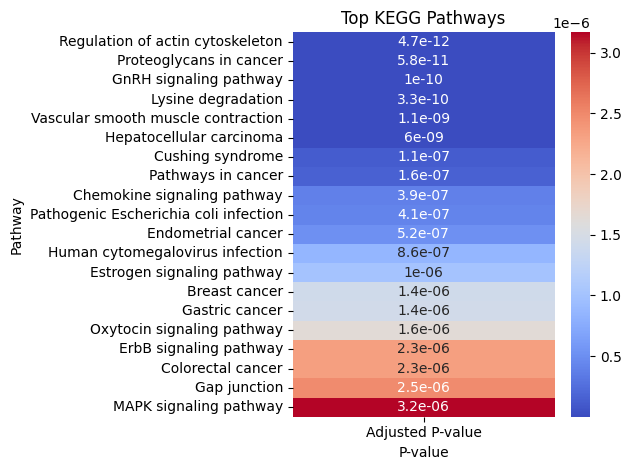

In [44]:
# Creating a heatmap of top pathways
sns.heatmap(kegg_top.set_index('Term')['Adjusted P-value'].to_frame(), cmap='coolwarm', annot=True, cbar=True)
plt.title('Top KEGG Pathways')
plt.ylabel('Pathway')
plt.xlabel('P-value')
plt.tight_layout()
plt.show()

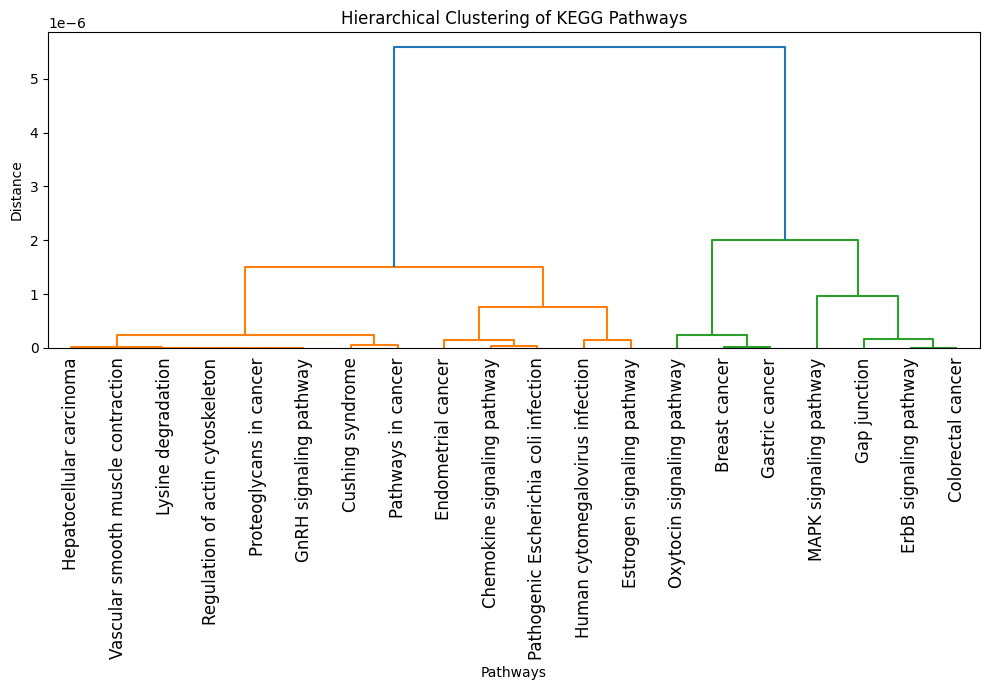

In [45]:
# Create hierarchical clustering linkage matrix
Z = sch.linkage(kegg_top['Adjusted P-value'].values.reshape(-1, 1), method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(Z, labels=kegg_top['Term'].values, leaf_rotation=90)
plt.title("Hierarchical Clustering of KEGG Pathways")
plt.xlabel("Pathways")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()